In [24]:
#
# Import needed packages
#
import numpy as np
import time
from numpy import genfromtxt
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#
# Read data
#
dataset = genfromtxt('realestate_final.csv', delimiter=',')
dataset = dataset[1:,:]

ndata=dataset.shape[0]
nvar=dataset.shape[1]
print('Number of data: %d \nNumber of variables: %d' % (ndata,nvar) )

X = dataset[:,0:nvar-2]
y = dataset[:,nvar-1]
nvar = nvar - 1

Number of data: 4844 
Number of variables: 111


In [3]:
#
# normalize the data attributes
#
nrm_X = preprocessing.normalize(X,axis=1)

#
# standardize the data attributes
#
stn_X = preprocessing.scale(nrm_X,axis=1)

#
# define parameters for cross-validation
#
nfold=5
test_frac=0.33
seed=1331

minsigma=-5
maxsigma=1
nsigma=5

mincost=1e2
maxcost=1e5
ncost=5

cvsigma=np.logspace(minsigma, maxsigma, nsigma)
cvcost=np.linspace(mincost,maxcost,ncost)

In [4]:
#
# 5-fold cross-validation to define parameters
#
cvape=np.zeros((nsigma,ncost,nfold))
for i in range(nfold):
    for j in range(nsigma):
        for k in range(ncost):
            print (" Working on: Fold=%10.4f, Sigma=%10.4f, Cost=%10.4f" % (i,cvsigma[j],cvcost[k]) )
            X_train, X_test, y_train, y_test = cross_validation.train_test_split( stn_X, y, test_size=test_frac, random_state=i+77 )
            svr_rbf=SVR(kernel='rbf', C=cvcost[k], gamma=cvsigma[j])
            y_pred=svr_rbf.fit(X_train, y_train).predict(X_test)
            cvape[i,j,k] = np.mean ( np.abs((y_test - y_pred)/y_test) )

 Working on: Fold=    0.0000, Sigma=    0.0000, Cost=  100.0000
 Working on: Fold=    0.0000, Sigma=    0.0000, Cost=25075.0000
 Working on: Fold=    0.0000, Sigma=    0.0000, Cost=50050.0000
 Working on: Fold=    0.0000, Sigma=    0.0000, Cost=75025.0000
 Working on: Fold=    0.0000, Sigma=    0.0000, Cost=100000.0000
 Working on: Fold=    0.0000, Sigma=    0.0003, Cost=  100.0000
 Working on: Fold=    0.0000, Sigma=    0.0003, Cost=25075.0000
 Working on: Fold=    0.0000, Sigma=    0.0003, Cost=50050.0000
 Working on: Fold=    0.0000, Sigma=    0.0003, Cost=75025.0000
 Working on: Fold=    0.0000, Sigma=    0.0003, Cost=100000.0000
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=  100.0000
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=25075.0000
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=50050.0000
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=75025.0000
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=100000.0000
 Working on: Fold=    0.0000, Sigma= 

In [9]:
#
# Mean absolute percentage error
#
cvmape=np.mean(cvape,axis=1)

In [10]:
#
# Get indexes of parameter combination with minimum error
#
idxsigma, idxcost = np.unravel_index(cvmape.argmin(), cvmape.shape)

In [11]:
#
# Print out Results
#
print("Best parameters: \n  Sigma = %10.4f\n  Cost = %10.4f\n  Relative Accuracy = %10.4f" % (cvsigma[idxsigma],cvcost[idxcost],cvmape[idxsigma,idxcost]))

Best parameters: 
  Sigma =     0.3162
  Cost = 100000.0000
  Relative Accuracy =     0.3258


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


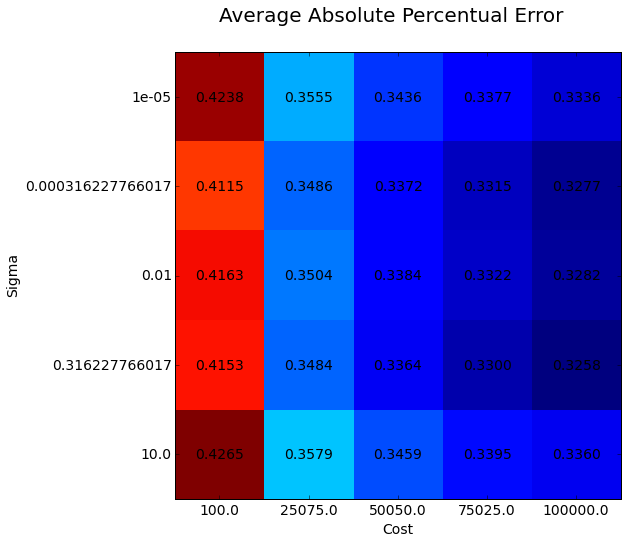

In [28]:
#
# Plot results for all combinations tested
#
matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1,figsize=(8,8))
ax.imshow(cvmape,interpolation='nearest')
for i in range(nsigma):
    for j in range(ncost):
        ax.text(i,j,("%.4f" % cvmape[j,i]), va='center', ha='center')
        

fig.suptitle('Average Absolute Percentual Error', fontsize=20)
plt.xlabel('Cost')
plt.ylabel('Sigma')

plt.xticks(range(ncost),cvcost)
plt.yticks(range(nsigma),cvsigma)

fig.show()